# Loan Approval Classification

## Import , Understand & Preprocess

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Columns
_____
* no_of_dependents: Range(0,5)
* education: Not Graduate = 0, Graduate = 1
* self_employed: No = 0, Yes = 1
* income_annum: Range(200000,9900000)
* loan_amount: Range(300000,39500000)
* loan_term: Range(2,20)
* cibil_score: Range(300,900)
* residential_assets_value: Range(-100000,29100000)
* commercial_assets_value: Range(0,19400000)
* luxury_assets_value: Range(300000,39200000)
* bank_asset_value: Range(0,14700000)
* loan_status: Rejected = 0, Approved = 1

##### Note: Data processed using rapid miner

In [2]:
df=pd.read_csv("loan_approval.csv")
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2.0,1,0,9600000.0,29900000.0,12.0,778.0,2400000.0,17600000.0,22700000.0,8000000.0,1
1,0.0,0,1,4100000.0,12200000.0,8.0,417.0,2700000.0,2200000.0,8800000.0,3300000.0,0
2,3.0,1,0,9100000.0,29700000.0,20.0,506.0,7100000.0,4500000.0,33300000.0,12800000.0,0
3,3.0,1,0,8200000.0,30700000.0,8.0,467.0,18200000.0,3300000.0,23300000.0,7900000.0,0
4,5.0,0,1,9800000.0,24200000.0,20.0,382.0,12400000.0,8200000.0,29400000.0,5000000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5.0,1,1,1000000.0,2300000.0,12.0,317.0,2800000.0,500000.0,3300000.0,800000.0,0
4265,0.0,0,1,3300000.0,11300000.0,20.0,559.0,4200000.0,2900000.0,11000000.0,1900000.0,1
4266,2.0,0,0,6500000.0,23900000.0,18.0,457.0,1200000.0,12400000.0,18100000.0,7300000.0,0
4267,1.0,0,0,4100000.0,12800000.0,8.0,780.0,8200000.0,700000.0,14100000.0,5800000.0,1


### Understand

In [3]:
df.isna().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [4]:
df.describe()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269.000000
mean,2.498712,0.502225,0.503631,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,0.622160
std,1.695910,0.500054,0.500045,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,0.484904
min,0.000000,0.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,0.000000
25%,1.000000,0.000000,0.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,0.000000
50%,3.000000,1.000000,1.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,1.000000
75%,4.000000,1.000000,1.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,1.000000
max,5.000000,1.000000,1.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   no_of_dependents          4269 non-null   float64
 1   education                 4269 non-null   int64  
 2   self_employed             4269 non-null   int64  
 3   income_annum              4269 non-null   float64
 4   loan_amount               4269 non-null   float64
 5   loan_term                 4269 non-null   float64
 6   cibil_score               4269 non-null   float64
 7   residential_assets_value  4269 non-null   float64
 8   commercial_assets_value   4269 non-null   float64
 9   luxury_assets_value       4269 non-null   float64
 10  bank_asset_value          4269 non-null   float64
 11  loan_status               4269 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 400.3 KB


In [6]:
df.duplicated().value_counts()

False    4269
dtype: int64

In [7]:
df = df.astype("int64")

<AxesSubplot:>

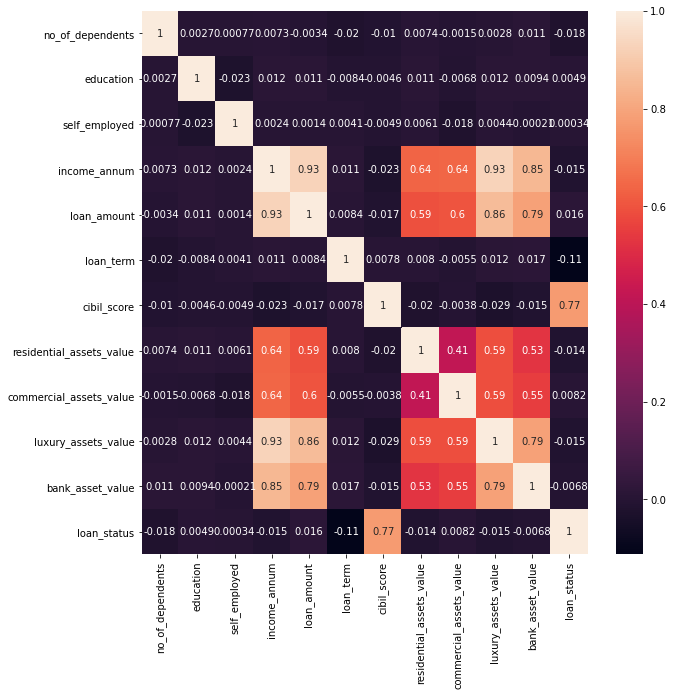

In [8]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(),annot=True, ax = ax)

In [9]:
df.loan_status.value_counts()

1    2656
0    1613
Name: loan_status, dtype: int64

### Preprocessing

In [10]:
df_n = df.copy()
for i in df_n.columns:
    df_n[i] = (df_n[i] - df_n[i].min()) / (df_n[i].max() - df_n[i].min())
df_n.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0.4,1.0,0.0,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,1.0
1,0.0,0.0,1.0,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,0.0
2,0.6,1.0,0.0,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,0.0
3,0.6,1.0,0.0,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,0.0
4,1.0,0.0,1.0,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,0.0


In [11]:
df_n.loan_status = df_n.loan_status.astype('int64')
df_n.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0.4,1.0,0.0,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,1
1,0.0,0.0,1.0,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,0
2,0.6,1.0,0.0,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,0
3,0.6,1.0,0.0,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,0
4,1.0,0.0,1.0,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,0


In [12]:
x=df_n.drop('loan_status',axis=1)
y=df_n.loan_status

In [13]:
x.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,0.4,1.0,0.0,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218
1,0.0,0.0,1.0,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490
2,0.6,1.0,0.0,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748
3,0.6,1.0,0.0,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415
4,1.0,0.0,1.0,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136


In [14]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

## Build Model

In [15]:
import warnings
warnings.simplefilter('ignore')

In [16]:
from sklearn.model_selection import train_test_split

x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.2,random_state=6)

for l in x_tr,x_te,y_tr,y_te:
    print(l.shape)

(3415, 11)
(854, 11)
(3415,)
(854,)


In [17]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


def df_clfs(x_train=x_tr,y_train=y_tr,x_test=x_te,y_test=y_te,
            classifier=[LogisticRegression(max_iter=1000),KNeighborsClassifier(),SVC(),RandomForestClassifier(),
                        AdaBoostClassifier(),XGBClassifier()]):
    """
    Function To Create Plot For Score of Classifiers with No Tunning
    """
    b_s={}
    for clf in classifier:
        
        clf.fit(x_train,y_train)
        b_s[f"{clf}".split("(")[0]+" : ("+f"{clf.score(x_test,y_test)}"[:4]+")"]=clf.score(x_test,y_test)
        clfs=pd.DataFrame(b_s,index=["Scores"])
        plt.barh(clfs.columns,clfs.loc['Scores'],align="center",color='orange')

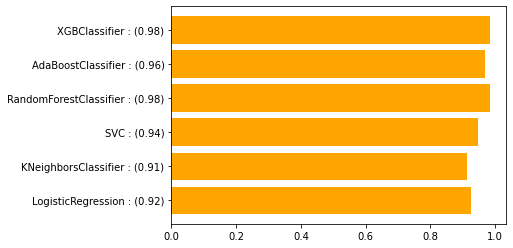

In [18]:
df_clfs()

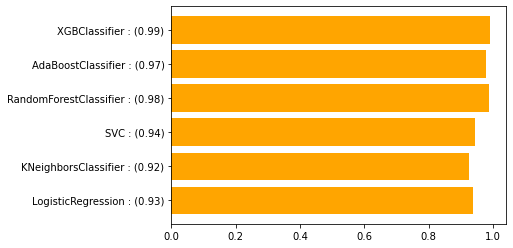

In [19]:
from sklearn.model_selection import cross_val_score

def rec_clfs(x,y,classifier=[LogisticRegression(max_iter=1000),KNeighborsClassifier(),
                             SVC(),RandomForestClassifier(),AdaBoostClassifier(),XGBClassifier()]):
    """
    Function To Create Plot From Mean Of Cross Validation Scores `Recall` of Classifiers with No Tunning
    """
    b_s={}
    for clf in classifier:
        val=np.mean(cross_val_score(clf,x,y,scoring="recall"))
        b_s[f"{clf}".split("(")[0]+" : ("+f"{val}"[:4]+")"]=val
        clfs=pd.DataFrame(b_s,index=["Scores"])
        plt.barh(clfs.columns,clfs.loc['Scores'],align="center",color='orange')

rec_clfs(x,y)

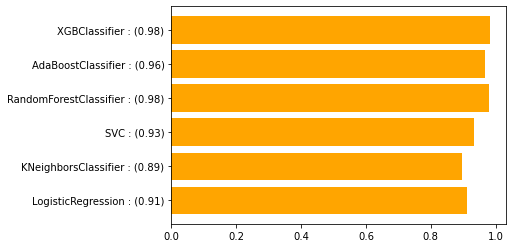

In [20]:
from sklearn.model_selection import cross_val_score

def f1_clfs(x,y,classifier=[LogisticRegression(max_iter=1000),KNeighborsClassifier(),
                             SVC(),RandomForestClassifier(),AdaBoostClassifier(),XGBClassifier()]):
    """
    Function To Create Plot From Mean Of Cross Validation Scores `F1_Macro` of Classifiers with No Tunning
    """
    b_s={}
    for clf in classifier:
        val=np.mean(cross_val_score(clf,x,y,scoring="f1_macro"))
        b_s[f"{clf}".split("(")[0]+" : ("+f"{val}"[:4]+")"]=val
        clfs=pd.DataFrame(b_s,index=["Scores"])
        plt.barh(clfs.columns,clfs.loc['Scores'],align="center",color='orange')

f1_clfs(x,y)

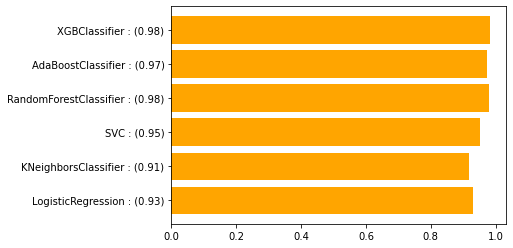

In [21]:
from sklearn.model_selection import cross_val_score

def prec_clfs(x,y,classifier=[LogisticRegression(max_iter=1000),KNeighborsClassifier(),
                             SVC(),RandomForestClassifier(),AdaBoostClassifier(),XGBClassifier()]):
    """
    Function To Create Plot From Mean Of Cross Validation Scores `Precision` of Classifiers with No Tunning
    """
    b_s={}
    for clf in classifier:
        val=np.mean(cross_val_score(clf,x,y,scoring="precision"))
        b_s[f"{clf}".split("(")[0]+" : ("+f"{val}"[:4]+")"]=val
        clfs=pd.DataFrame(b_s,index=["Scores"])
        plt.barh(clfs.columns,clfs.loc['Scores'],align="center",color='orange')

prec_clfs(x,y)

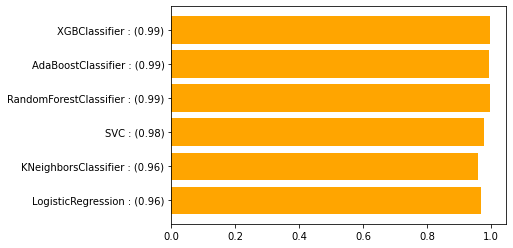

In [22]:
from sklearn.model_selection import cross_val_score

def roc_clfs(x,y,classifier=[LogisticRegression(max_iter=1000),KNeighborsClassifier(),
                             SVC(),RandomForestClassifier(),AdaBoostClassifier(),XGBClassifier()]):
    """
    Function To Create Plot From Mean Of Cross Validation Scores `ROC_AUC` of Classifiers with No Tunning
    """
    b_s={}
    for clf in classifier:
        val=np.mean(cross_val_score(clf,x,y,scoring="roc_auc"))
        b_s[f"{clf}".split("(")[0]+" : ("+f"{val}"[:4]+")"]=val
        clfs=pd.DataFrame(b_s,index=["Scores"])
        plt.barh(clfs.columns,clfs.loc['Scores'],align="center",color='orange')

roc_clfs(x,y)

### Results and Discussion
* Initial cleaning and processing of the dataset was performed using RapidMiner TurboPrep
* The data was further normalized using MinMax Normalization technique which presented all the values between 0 and 1
* Dataset was classified using 6 classifiers: XGBClassifier, AdaBoostClassifier, RandomForestClassifier, SVC, KNeighboursClassifier, and LogisticRegression
* No hypertuning was performed due to accuracy results being greater than 0.95 for most classifiers
* XGBClassifier performed slightly better than the other classifiers across metrics such as Recall, Precision, F1_Macro and ROC_AUC scores
* KNeighboursClassifier performed slightly worse than the other classifiers across metrics such as Recall, Precision, F1_Macro and ROC_AUC scores